# Understanding the temperature issue

This notebook tries to understand why the temperatures in the snow layers are so similar from a layer to the next.

## Imports and functions

In [34]:
import snowtemp_test
import ddensity
import matplotlib.pyplot as plt

In [35]:
# %run little_awk_functions.py

## Test situation

In [36]:
# Initial state with 3 layers

ro_layer = [100, 100, 100, 100]
tf = 0
dt = 100
ro_water = 1000
ro_ice = 910
t_old = [-5, -5, -5, -5]
jj = 4
dy_snow = [5, 5, 5, 5]
a1 = 0.0013
a2 = 0.021
gamma = [0, 0, 0, 0]
tsfc = -25
cp_snow = 2106
melt_flag = [0, 0, 0, 0]

In [37]:
# Initialize arrays to keep track of variables in time

ro_layer_evolution = [ro_layer]
depth_evolution = [dy_snow]
temperature_evolution = [t_old]

In [38]:
# Update variables at each timepoint

for i in range(20):
    ro_layer, dy_snow = ddensity.ddensity_ml(ro_layer, tf, dt, ro_water, 
                                         ro_ice, t_old, jj, dy_snow, a1, a2)
    t_old = snowtemp_test.snowtemp_ml(gamma, t_old, tsfc, jj, dt, ro_layer, cp_snow, 
                                 tf, dy_snow, melt_flag)
    ro_layer_evolution.append(ro_layer)
    depth_evolution.append(dy_snow)
    temperature_evolution.append(t_old)

In [39]:
comment = '''
Problems observed above: gamma from both getgamm and gamma1 are equal to zero for layer 4, from the start That is not the case with the other layers.
No, actually that's because JJ was not set properly. > check the value of jj (?)

Eventually, they all go to tsfc anyways.

The curves with jj wrong looked a lot like the problematic ones I used to have: angles, non-continuous,
brutal transitions
'''

Text(0, 0.5, 'Temperature')

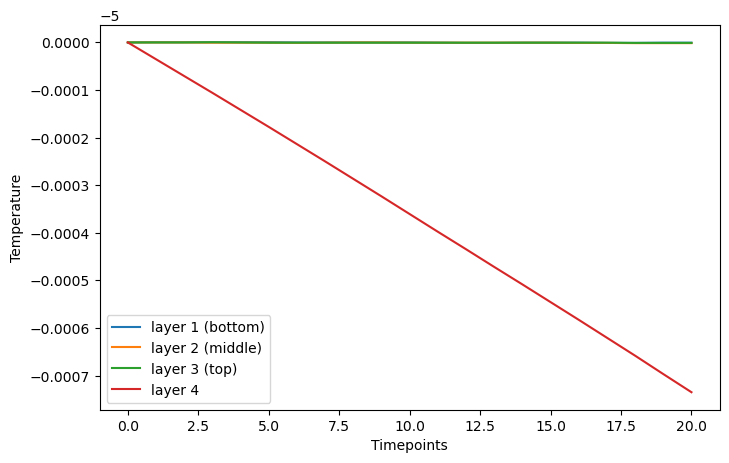

In [40]:
# Temperature

layer1 = [temperature_evolution[i][0] for i in range(len(temperature_evolution))]
layer2 = [temperature_evolution[i][1] for i in range(len(temperature_evolution))]
layer3 = [temperature_evolution[i][2] for i in range(len(temperature_evolution))]
layer4 = [temperature_evolution[i][3] for i in range(len(temperature_evolution))]
# layer5 = [temperature_evolution[i][4] for i in range(len(temperature_evolution))]

plt.figure(figsize=(8, 5))
plt.plot(layer1, label='layer 1 (bottom)')
plt.plot(layer2, label='layer 2 (middle)')
plt.plot(layer3, label='layer 3 (top)')
plt.plot(layer4, label='layer 4')
# plt.plot(layer5, label='layer 5')
plt.legend()
plt.xlabel('Timepoints')
plt.ylabel('Temperature')

## Try to reproduce the situation in 02-combining-... notebook

Between iterations 20740 and 20760

In [41]:
# Initial state with 3 layers

ro_layer = [150, 150, 150, 0]
tf = 0
dt = 100
ro_water = 1000
ro_ice = 910
t_old = [-25, -25, -25, 0]
jj = 3
dy_snow = [0.08, 0.03, 0.05, 0]
a1 = 0.0013
a2 = 0.021
gamma = [0, 0, 0, 0]
tsfc = -25
cp_snow = 2106
melt_flag = [0, 0, 0, 0]

In [42]:
# Initialize arrays to keep track of variables in time

ro_layer_evolution = [ro_layer]
depth_evolution = [dy_snow]
temperature_evolution = [t_old]

In [43]:
# Update variables at each timepoint

for i in range(20):
    
    if i==3:
        ro_layer[3] = 150
        dy_snow[3] = 0.16
        t_old[3] = -2
        melt_flag[3] = 0
        jj += 1
    
    ro_layer, dy_snow = ddensity.ddensity_ml(ro_layer, tf, dt, ro_water, 
                                         ro_ice, t_old, jj, dy_snow, a1, a2)
    t_old = snowtemp_test.snowtemp_ml(gamma, t_old, tsfc, jj, dt, ro_layer, cp_snow, 
                                 tf, dy_snow, melt_flag)
    ro_layer_evolution.append(ro_layer)
    depth_evolution.append(dy_snow)
    temperature_evolution.append(t_old)

Text(0, 0.5, 'Temperature')

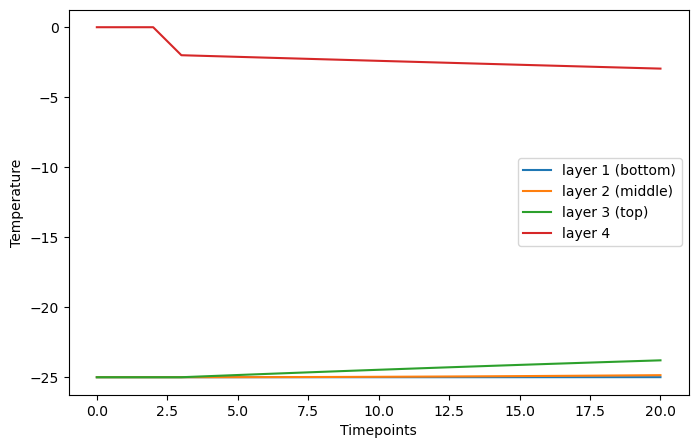

In [44]:
# Temperature

layer1 = [temperature_evolution[i][0] for i in range(len(temperature_evolution))]
layer2 = [temperature_evolution[i][1] for i in range(len(temperature_evolution))]
layer3 = [temperature_evolution[i][2] for i in range(len(temperature_evolution))]
layer4 = [temperature_evolution[i][3] for i in range(len(temperature_evolution))]
# layer5 = [temperature_evolution[i][4] for i in range(len(temperature_evolution))]

plt.figure(figsize=(8, 5))
plt.plot(layer1, label='layer 1 (bottom)')
plt.plot(layer2, label='layer 2 (middle)')
plt.plot(layer3, label='layer 3 (top)')
plt.plot(layer4, label='layer 4')
# plt.plot(layer5, label='layer 5')
plt.legend()
plt.xlabel('Timepoints')
plt.ylabel('Temperature')

In [50]:
comments = '''
CONCLUSION: it is CONSISTENT (perfectly it seems) with what is observed in the model youhou!

It seems the quick variations come from th fact that layers are very thin > is it a magnitude problem?
What is the unit of depth in the temperature model?

Also, could we set a bottom layer to temperature zero artificially (representing the ground)?
> modify the fortran code
EUH NON it's already included in the model assurement

'''

## Trying the same situation with thicker layers (x 10)

In [46]:
# Initial state with 3 layers

ro_layer = [150, 150, 150, 0]
tf = 0
dt = 100
ro_water = 1000
ro_ice = 910
t_old = [-25, -25, -25, 0]
jj = 3
dy_snow = [0.8, 0.3, 0.5, 0]
a1 = 0.0013
a2 = 0.021
gamma = [0, 0, 0, 0]
tsfc = -25
cp_snow = 2106
melt_flag = [0, 0, 0, 0]

In [47]:
# Initialize arrays to keep track of variables in time

ro_layer_evolution = [ro_layer]
depth_evolution = [dy_snow]
temperature_evolution = [t_old]

In [48]:
# Update variables at each timepoint

for i in range(20):
    
    if i==3:
        ro_layer[3] = 150
        dy_snow[3] = 1.6
        t_old[3] = -2
        melt_flag[3] = 0
        jj += 1
    
    ro_layer, dy_snow = ddensity.ddensity_ml(ro_layer, tf, dt, ro_water, 
                                         ro_ice, t_old, jj, dy_snow, a1, a2)
    t_old = snowtemp_test.snowtemp_ml(gamma, t_old, tsfc, jj, dt, ro_layer, cp_snow, 
                                 tf, dy_snow, melt_flag)
    ro_layer_evolution.append(ro_layer)
    depth_evolution.append(dy_snow)
    temperature_evolution.append(t_old)

Text(0, 0.5, 'Temperature')

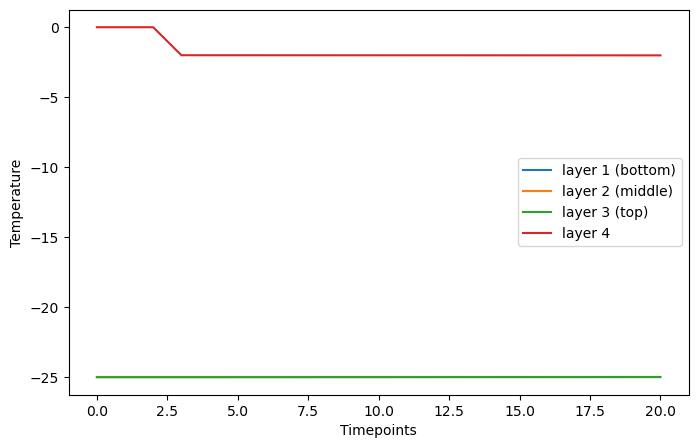

In [49]:
# Temperature

layer1 = [temperature_evolution[i][0] for i in range(len(temperature_evolution))]
layer2 = [temperature_evolution[i][1] for i in range(len(temperature_evolution))]
layer3 = [temperature_evolution[i][2] for i in range(len(temperature_evolution))]
layer4 = [temperature_evolution[i][3] for i in range(len(temperature_evolution))]
# layer5 = [temperature_evolution[i][4] for i in range(len(temperature_evolution))]

plt.figure(figsize=(8, 5))
plt.plot(layer1, label='layer 1 (bottom)')
plt.plot(layer2, label='layer 2 (middle)')
plt.plot(layer3, label='layer 3 (top)')
plt.plot(layer4, label='layer 4')
# plt.plot(layer5, label='layer 5')
plt.legend()
plt.xlabel('Timepoints')
plt.ylabel('Temperature')

In [51]:
comments = '''
The thickness of layers plays a crucial part (obviously).
'''